In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns

In [3]:
df=pd.read_csv("predictive_maintenance.csv")
df.sample(5)
# Data set has 6 features and one target

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8842,8843,L56022,L,297.3,308.7,1492,43.6,189,0,No Failure
4361,4362,M19221,M,302.1,310.1,1379,48.2,166,1,Heat Dissipation Failure
6923,6924,L54103,L,301.2,311.7,1433,49.3,206,0,No Failure
4350,4351,M19210,M,301.9,309.7,1568,37.5,135,0,No Failure
2120,2121,H31534,H,299.2,308.8,1908,21.3,104,0,No Failure


In [4]:
#understanding the data
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## 1. EDA (Univariate)

#### Histograms/Distplots/boxplots for Numerical Data

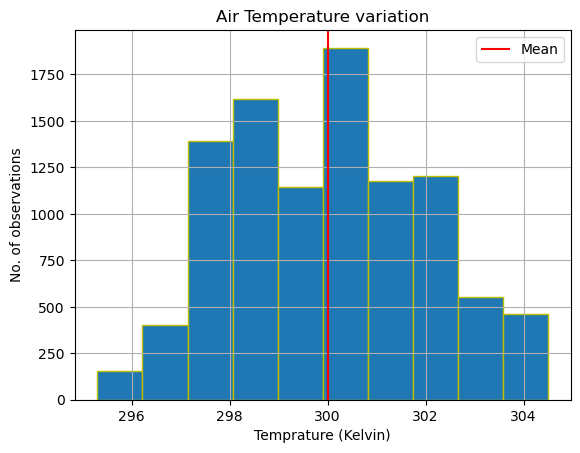

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


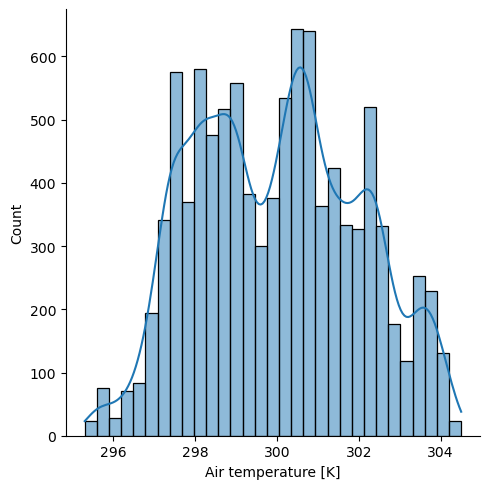

In [21]:
plt.title("Air Temperature variation")
plt.xlabel("Temprature (Kelvin)")
plt.ylabel("No. of observations")
plt.hist(df['Air temperature [K]'],edgecolor='y',align='mid')
plt.axvline(300.00493,color='r',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result :- Data less of normally distributed
sns.displot(df['Air temperature [K]'],kde=True)

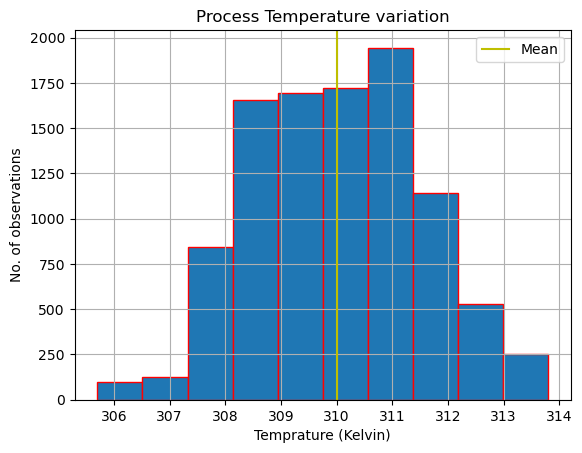

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


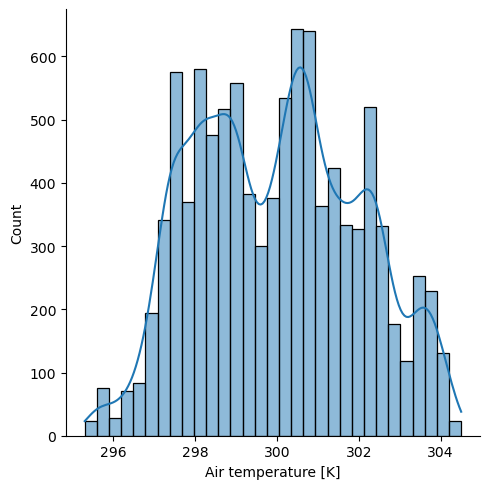

In [22]:
plt.title("Process Temperature variation")
plt.xlabel("Temprature (Kelvin)")
plt.ylabel("No. of observations")
plt.hist(df['Process temperature [K]'],edgecolor='r',align='mid')
plt.axvline(310.00556,color='y',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result data is normally distributed with somewhat normal distribution
sns.displot(df['Air temperature [K]'],kde=True)
plt.show()

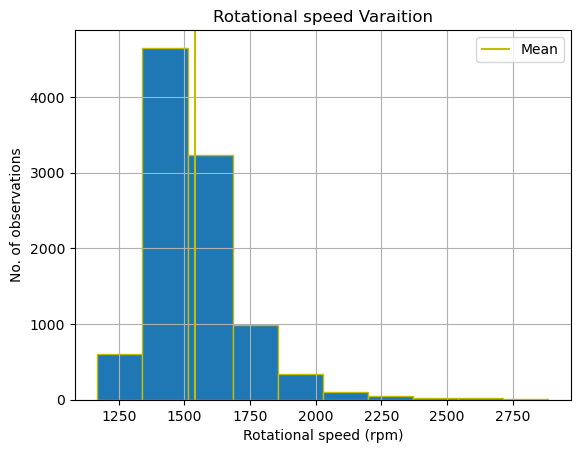

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


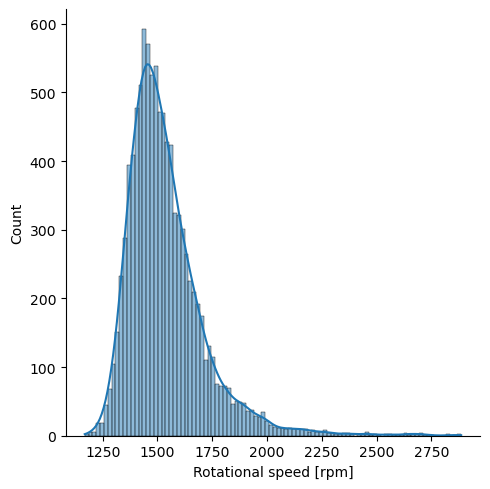

In [7]:
plt.title("Rotational speed Varaition")
plt.xlabel("Rotational speed (rpm)")
plt.ylabel("No. of observations")
plt.hist(df['Rotational speed [rpm]'],edgecolor='y',align='mid')
plt.axvline(1538.7761,color='y',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result :- Data is right skewed 
sns.displot(df['Rotational speed [rpm]'],kde=True)

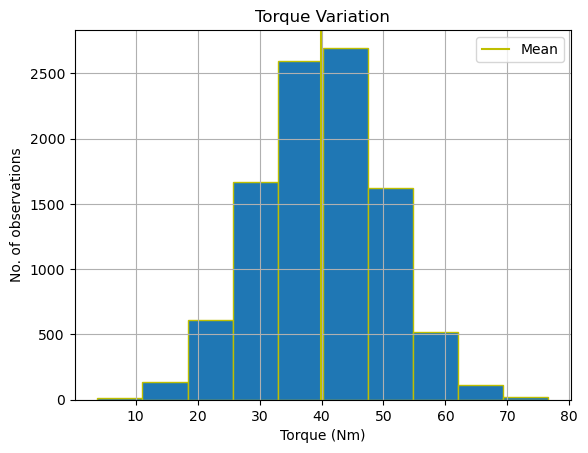

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


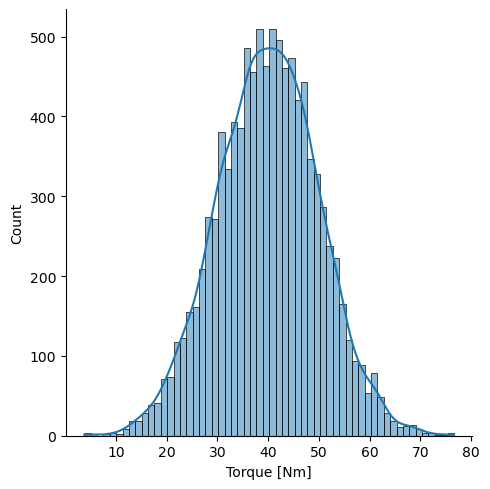

In [8]:
plt.title("Torque Variation")
plt.xlabel("Torque (Nm)")
plt.ylabel("No. of observations")
plt.hist(df['Torque [Nm]'],edgecolor='y',align='mid')
plt.axvline(39.9869,color='y',label='Mean')
plt.grid()
plt.legend() 
plt.show() #Result :- Data is normally distributed
sns.displot(df['Torque [Nm]'],kde=True)

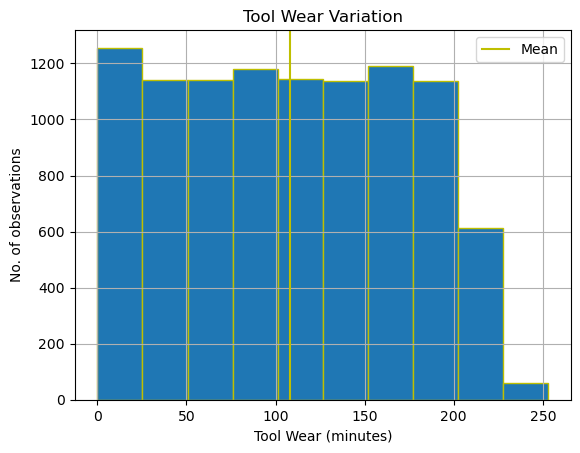

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


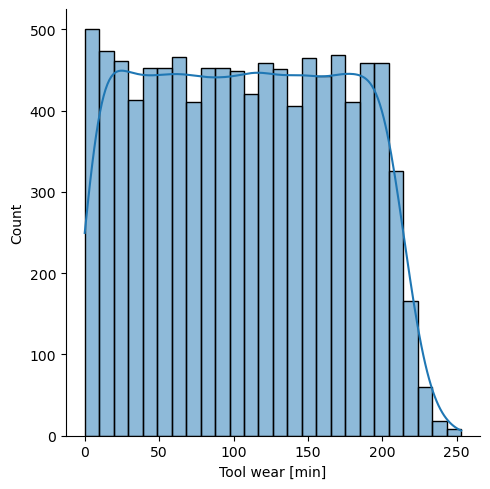

In [9]:
plt.title("Tool Wear Variation")
plt.xlabel("Tool Wear (minutes)")
plt.ylabel("No. of observations")
plt.hist(df['Tool wear [min]'],edgecolor='y',align='mid')
plt.axvline(107.951,color='y',label='Mean')
plt.grid()
plt.legend() 
plt.show() #Result :- Tool Wear timing equally distributed across timeframes
sns.displot(df['Tool wear [min]'],kde=True)

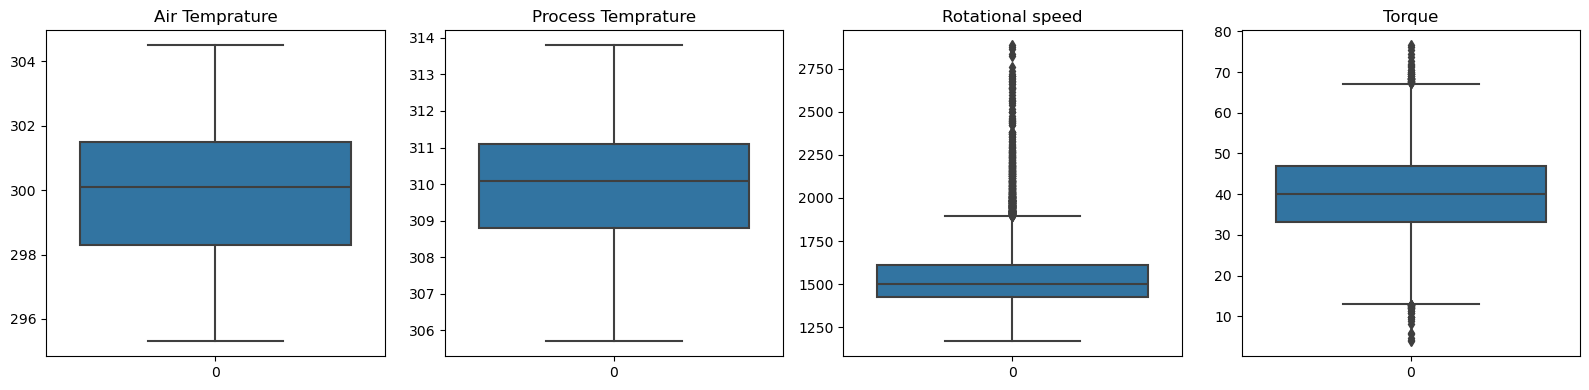

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
sns.boxplot(data=df['Air temperature [K]'], ax=axes[0])
sns.boxplot(data=df['Process temperature [K]'], ax=axes[1])
sns.boxplot(data=df['Rotational speed [rpm]'], ax=axes[2])
sns.boxplot(data=df['Torque [Nm]'], ax=axes[3])

axes[0].set_title('Air Temprature')
axes[1].set_title('Process Temprature')
axes[2].set_title('Rotational speed')
axes[3].set_title('Torque')

plt.tight_layout() 
plt.show()
#Results :- Torque and Rotational speed need Outlier processing

#### Categorical data analysis for column 'Type'

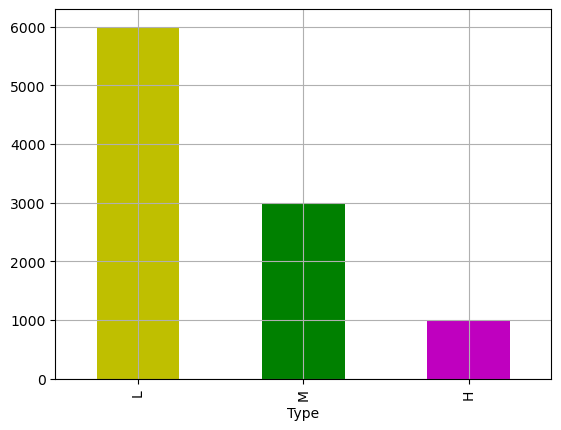

In [18]:
df['Type'].value_counts().plot(kind='bar',color=['y','g','m'])
plt.grid()
plt.show()

In [ ]:
df['Type'].value_counts().plot(kind='pie',autopct='%.2f')

## 2. EDA (Multivariate)

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

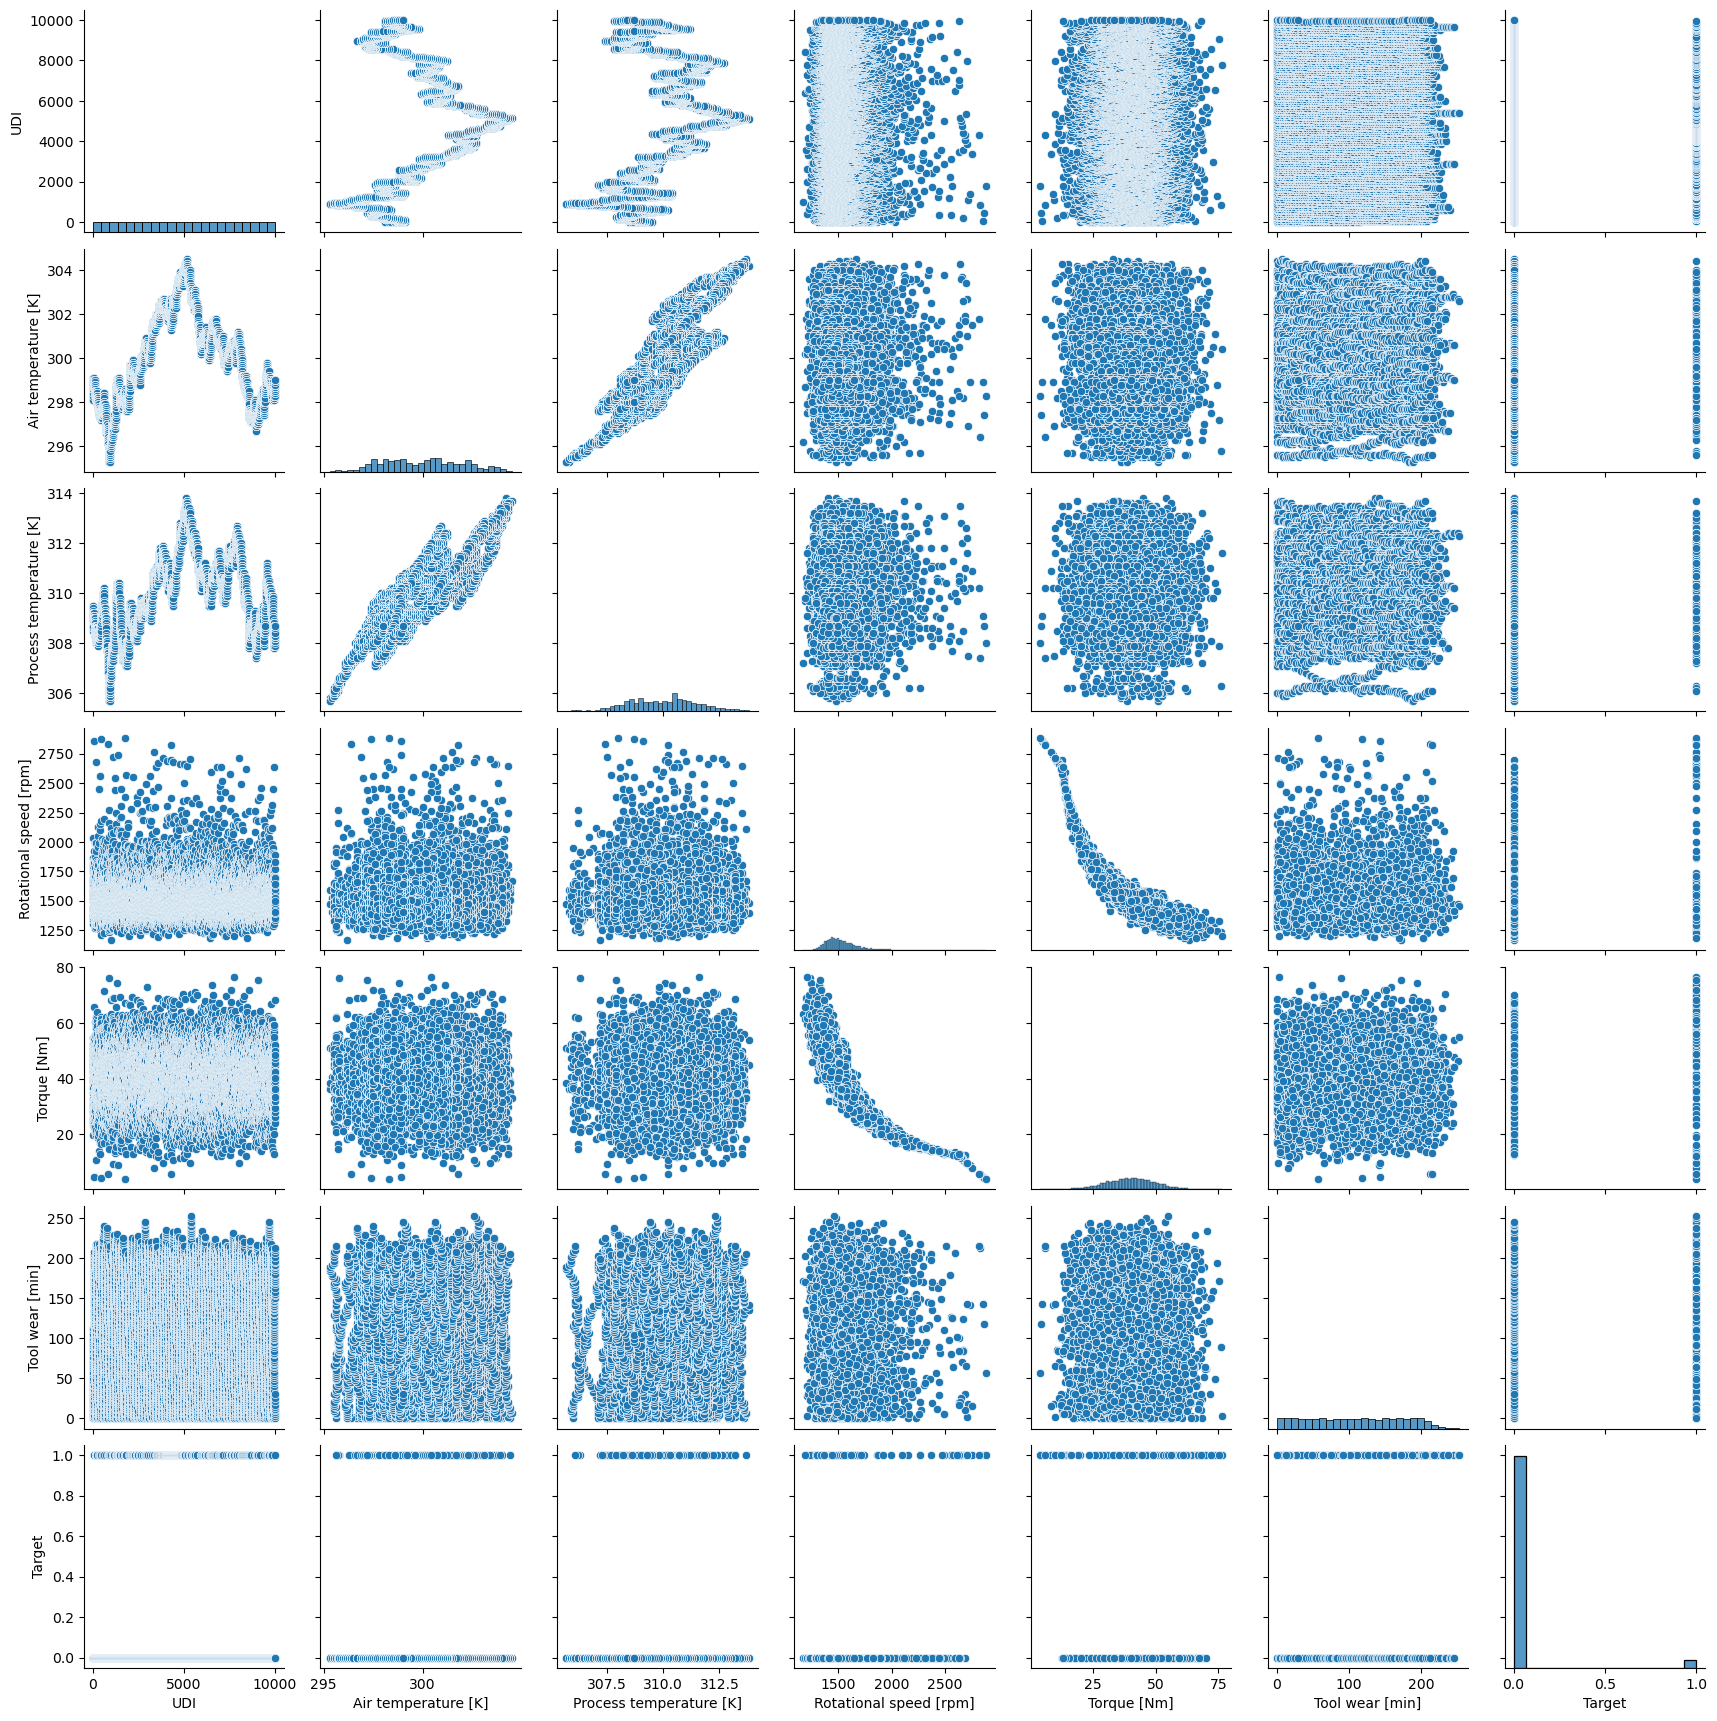

In [31]:
sns.pairplot(df)
plt.show()

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\979058862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Air temperature [K]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\979058862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

<Axes: xlabel='Air temperature [K]', ylabel='Density'>

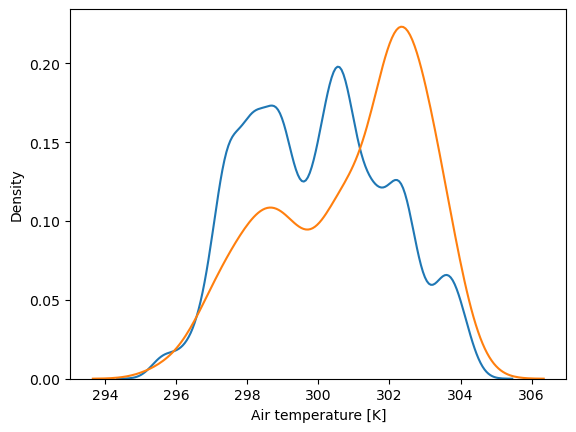

In [33]:
sns.distplot(df[df['Target']==0]['Air temperature [K]'],hist=False)
sns.distplot(df[df['Target']==1]['Air temperature [K]'],hist=False)
#Result= More chances of Failure at Higher Air Temprature

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\2018188273.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Process temperature [K]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\2018188273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

<Axes: xlabel='Process temperature [K]', ylabel='Density'>

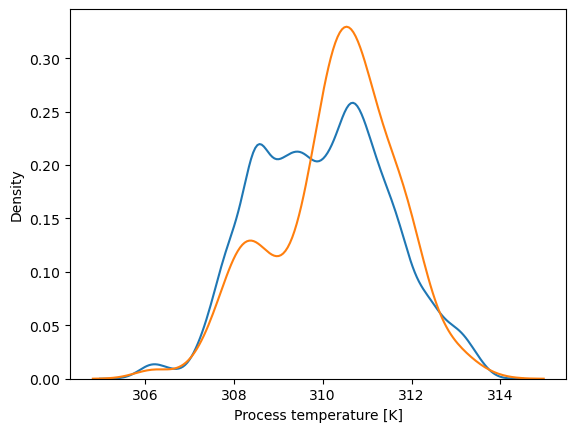

In [38]:
sns.distplot(df[df['Target']==0]['Process temperature [K]'],hist=False)
sns.distplot(df[df['Target']==1]['Process temperature [K]'],hist=False)
#Result=Higher chances of failure at Higher tempratures

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\3456977453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Rotational speed [rpm]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\3456977453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

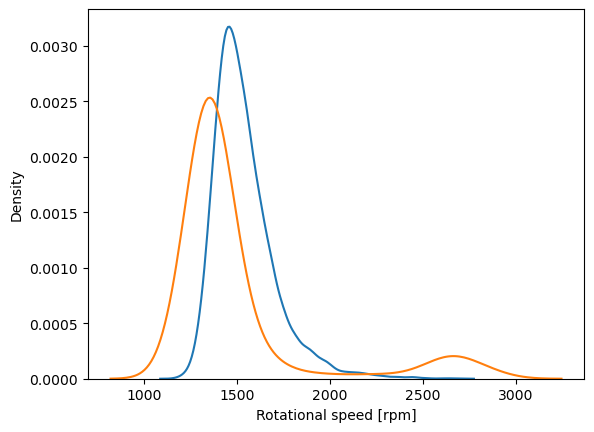

In [39]:
sns.distplot(df[df['Target']==0]['Rotational speed [rpm]'],hist=False)
sns.distplot(df[df['Target']==1]['Rotational speed [rpm]'],hist=False)
#Result = Lower Rotational Speeds -> More chances of failure

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\3086431765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Torque [Nm]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\3086431765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fig

<Axes: xlabel='Torque [Nm]', ylabel='Density'>

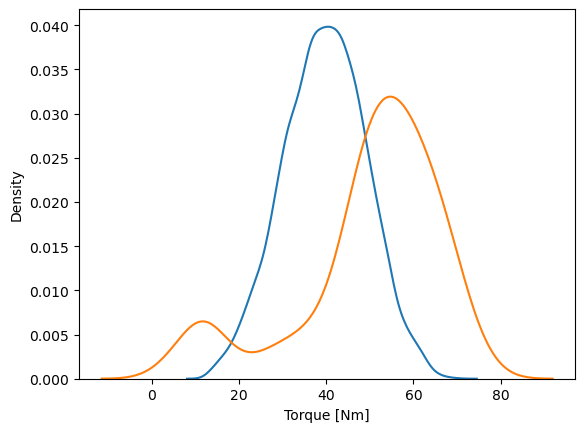

In [40]:
sns.distplot(df[df['Target']==0]['Torque [Nm]'],hist=False)
sns.distplot(df[df['Target']==1]['Torque [Nm]'],hist=False)
#Result= More Rotational speeds -> More chances of failure 

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\3189515445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Tool wear [min]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_3344\3189515445.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a

<Axes: xlabel='Tool wear [min]', ylabel='Density'>

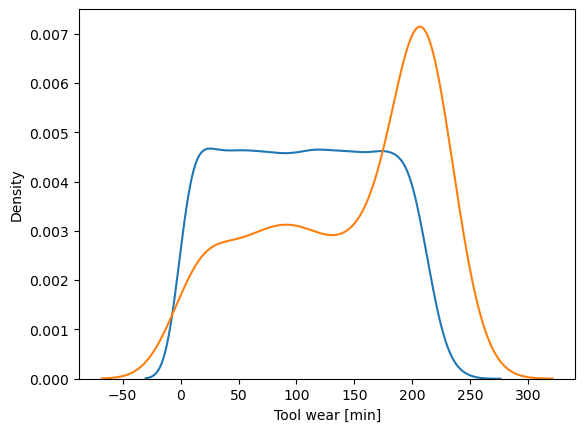

In [41]:
sns.distplot(df[df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Target']==1]['Tool wear [min]'],hist=False)
